# Chapter 9 Plotting and Visualization

Making informative visualizations is one of the most important tasks in data analysis. It may serve the purpose for:

- Data exploration
- Getting ideas for building models
- Present findings

Let's start with matplotlib, a widely-used Python library for making plots.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Make a single plot

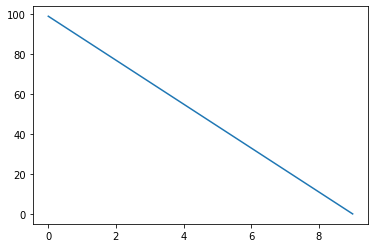

In [2]:
# A simple line plot
x_coordinates = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) # or np.arange(10)
y_coordinates = np.array([99, 88, 77, 66, 55, 44, 33, 22, 11, 0])
plt.plot(x_coordinates, y_coordinates)

# 2. Colors, markers, and line styles

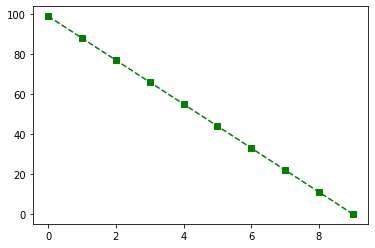

In [3]:
# A green broken line with square marker
plt.plot(x_coordinates, y_coordinates, color='g', marker='s', linestyle='--')

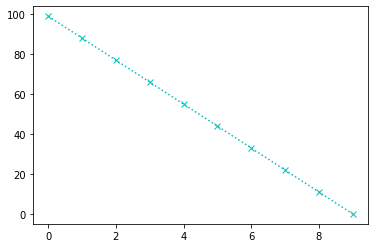

In [4]:
# Use a single string
plt.plot(x_coordinates, y_coordinates, 'cx:')

Here you can find many options for color, marker, and line style:
- [Colors](https://matplotlib.org/2.0.2/api/colors_api.html)
- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Line styles](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html)

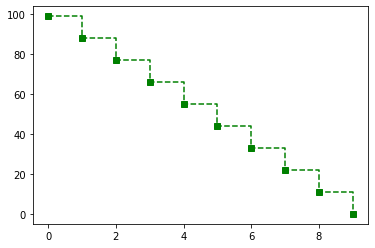

In [5]:
# Step curve
plt.plot(x_coordinates, y_coordinates, 'gs--', drawstyle='steps-post')

# 3. Subplots
Matplotlib plots reside within a Figure object created by `plt.figure()`. A new subplot can be added using statement `ax = fig.add_subplot(a, b, c)`, where:
- a: number of rows
- b: number of columns
- c: number of current plot

In [6]:
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
data = pd.DataFrame(json.loads(res.content)['Data'])
data = data.set_index('time')
data.index = pd.to_datetime(data.index, unit='s')
data.tail(3)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2020-01-08,8045.15,8458.65,7873.97,8160.36,85087.59,6.990043e+08
2020-01-09,7817.35,8047.11,7757.04,8045.15,40045.64,3.161995e+08
2020-01-10,7733.55,7852.06,7733.47,7817.35,5295.43,4.131551e+07


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<BarContainer object of 3 artists>

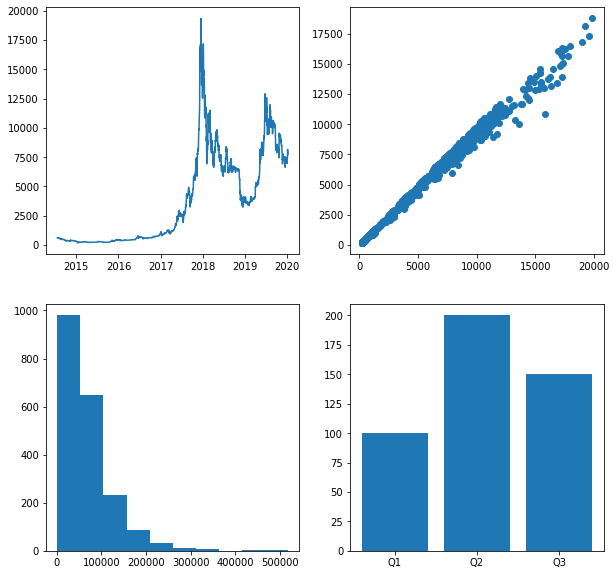

In [7]:
fig = plt.figure(figsize=(10, 10))

# plot close price vs. time
ax1 = fig.add_subplot(2, 2, 1)
# ax1 = fig.add_subplot(221) # the three arguments can be combined
ax1.plot(data.index, data['close'])

# plot high vs. low
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(data['high'], data['low'])

# plot a histogram on volume from
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(data['volumefrom'])

# plot a histogram on volume to
ax4 = fig.add_subplot(2, 2, 4)
ax4.bar(['Q1', 'Q2', 'Q3'], [100, 200, 150])

# 4. Ticks, labels, and legends


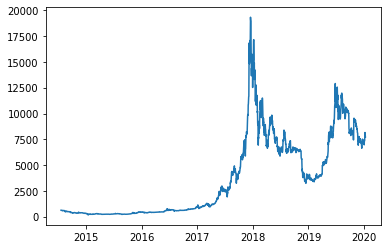

In [8]:
# plot close price vs. time
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'])

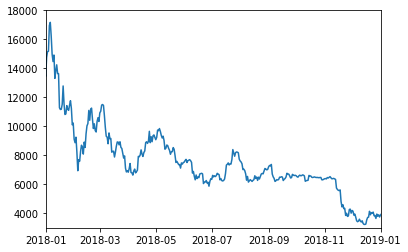

In [9]:
# Only show 2018 - 2019
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([datetime(2018, 1, 1), datetime(2019, 1, 1)])
ax.set_ylim([3000, 18000])
ax.plot(data.index, data['close'])

[Text(0, 0, 'Too bad'), Text(0, 0, 'OK'), Text(0, 0, 'Wonderful')]

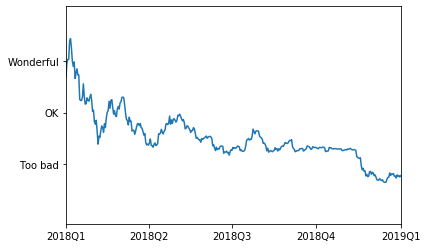

In [10]:
# Change tickes to quarters
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'])
ax.set_xlim([datetime(2018, 1, 1), datetime(2019, 1, 1)])
ax.set_xticks([datetime(2018, 1, 1),
                datetime(2018, 4, 1),
                datetime(2018, 7, 1),
                datetime(2018, 10, 1), 
                datetime(2019, 1, 1)])
ax.set_xticklabels(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1'])
ax.set_yticks([
    5000, 10000, 15000
])
ax.set_yticklabels(["Too bad", "OK", "Wonderful"])

Text(0.5, 1.0, 'Bitcoin Price')

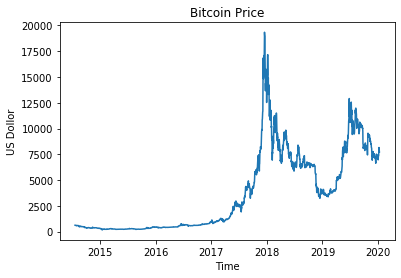

In [11]:
# Set x and y label
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'])
ax.set_ylabel("US Dollor")
ax.set_xlabel("Time")
ax.set_title("Bitcoin Price")

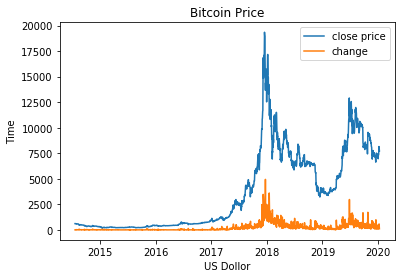

In [12]:
# Set x and y label
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'], label="close price")
ax.plot(data.index, data['high'] - data['low'], label='change')
ax.set_xlabel("US Dollor")
ax.set_ylabel("Time")
ax.set_title("Bitcoin Price")
ax.legend()

# 5. Save plots

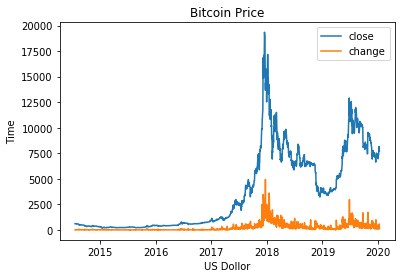

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data.index, data['close'], label="close")
ax.plot(data.index, data['high'] - data['low'], label='change')
ax.set_xlabel("US Dollor")
ax.set_ylabel("Time")
ax.set_title("Bitcoin Price")
ax.legend()
if not os.path.exists("images"): # Create images folder
    os.mkdir("images")
plt.savefig("images/BitcoinPrice.png")

# Exercise: Exploring NYC Taxi Data
Please download train.zip from [Kaggle](https://www.kaggle.com/c/nyc-taxi-trip-duration/data)

In [14]:
# # Extract files
# import zipfile
# # if not os.path.exists("Data"):
# #     os.mkdir("Data")
# with zipfile.ZipFile("../../Data/train.zip", "r") as file:
#     file.printdir()
#     file.extractall("../../Data/nyctaxi")

In [15]:
taxidata = pd.read_csv("../../Data/nyctaxi/train.csv", delimiter=",")

In [16]:
taxidata.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [17]:
print("Shape:", taxidata.shape)

Shape: (1458644, 11)


In [18]:
print("Feature names:", ", ".join(taxidata.columns))

Feature names: id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration


In [19]:
print("Data types:", taxidata.dtypes)

Data types: id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [20]:
# Change the data type of datetime columns
taxidata['pickup_datetime'] = taxidata['pickup_datetime'].astype(
    np.datetime64)

In [21]:
taxidata['dropoff_datetime'] = taxidata['dropoff_datetime'].astype(
                                np.datetime64)

In [22]:
print("Data Types:", taxidata.dtypes)

Data Types: id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object


In [23]:
# Missing values?
pd.isnull(taxidata).sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [24]:
# Look at statistics of numerical features
taxidata.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Visualization Task 1: Distribution of each column

In [25]:
# plt.hist(taxidata['vendor_id'])
taxidata['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64